In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import warnings
warnings.filterwarnings('ignore')
lonmin, lonmax = -180, 180
latmin, latmax = -60, 90
extents = [lonmin, lonmax, latmin, latmax]

All catchments: 20312
Selected catchments: 1116
Further selected catchments: 550


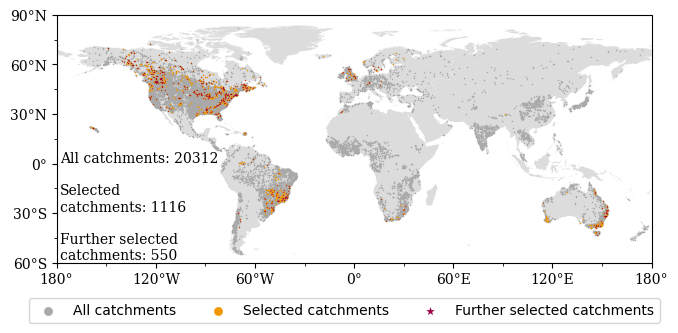

In [2]:
# Plotting Extended Data Fig. 1 (Figure S1)
def Figure_S1():
    colors = ['#9D0048', '#F39700', '#3D7D53', '#4A4B9D', '#E7242E', '#808000']

    fig = plt.figure(figsize=(7.0, 3.3))
    proj = ccrs.PlateCarree()
    ax = fig.add_subplot(111, projection=proj)
    name = "dataset\continent_shp\continent.shp"
    shpfile = shpreader.Reader(name)
    shape_feature = cfeature.ShapelyFeature(shpfile.geometries(), crs=ccrs.PlateCarree())
    ax.add_feature(shape_feature, edgecolor='k', facecolor='#DCDCDC', lw=0, ls=':', alpha=1, zorder=0)
    path = r"dataset\stations_shp\Stations.shp"
    lw = 0.04
    s = 1
    filename = path
    shpfile = shpreader.Reader(filename)
    points = list(shpfile.geometries())
    ax.scatter(
        [point.x for point in points], [point.y for point in points], transform=ccrs.PlateCarree(),
        s=s, color='darkgray', alpha=1, linewidth=lw)

    ax.scatter(
        [1000], [1000], transform=ccrs.PlateCarree(),
        s=40, color='darkgray', alpha=1, linewidth=lw, label='All catchments')

    print("All catchments: %d"%(len(points)))

    data = pd.read_excel(r"dataset\result.xlsx")
    lon = data['Lon']
    lat = data['Lat']
    Index = data['Index']

    ax.scatter(
        lon, lat, transform=ccrs.PlateCarree(),
        s=s, color=colors[1], alpha=1, linewidth=lw)

    ax.scatter(
        [1000], [1000], transform=ccrs.PlateCarree(),
        s=40, color=colors[1], alpha=1, linewidth=lw, label='Selected catchments')

    print("Selected catchments: %d"%(len(lon)))

    lon = lon[Index == 1]
    lat = lat[Index == 1]

    print("Further selected catchments: %d"%(len(lon)))

    ax.scatter(
        lon, lat, transform=ccrs.PlateCarree(), marker='*',
        s=s, color=colors[0], alpha=1, linewidth=lw)

    ax.scatter(
        [1000], [1000], transform=ccrs.PlateCarree(), marker='*',
        s=40, color=colors[0], alpha=1, linewidth=lw, label='Further selected catchments')
    handles, labels = ax.get_legend_handles_labels()

    ax.text(-178, -58, "All catchments: 20312\n\nSelected\ncatchments: 1116\n\nFurther selected\ncatchments: 550",
            family='serif',
            fontsize=10)

    fig.legend(handles, labels, ncol=3, bbox_to_anchor=(0.51, 0.01), loc='lower center')

    tick_proj = ccrs.PlateCarree()
    ax.set_xticks(np.arange(-180, 180 + 60, 60), crs=tick_proj)
    ax.set_xticks(np.arange(-180, 180 + 30, 30), minor=True, crs=tick_proj)
    ax.set_yticks(np.arange(-90, 90 + 30, 30), crs=tick_proj)
    ax.set_yticks(np.arange(-90, 90 + 15, 15), minor=True, crs=tick_proj)
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.set_extent(extents, crs=proj)
    plt.xticks(family='serif')
    plt.yticks(family='serif')

    plt.tight_layout()
    plt.subplots_adjust(
        top=1.0,
        bottom=0.178,
        left=0.099,
        right=0.949,
        hspace=0.2,
        wspace=0.2)
    plt.rcParams['savefig.dpi'] = 1500
    plt.show()
Figure_S1()